### Imports

In [14]:
import tables
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random
import seaborn as sns

### Loading Dataset

Loads the Dataset from the folder "Data". Loads the data for units, the time as well as the labels:
- units -> 700 different id units
- time -> from 0 to 1ms
- labels -> from 0-19 (0-9 German digits/ 10-19 english digits)

The Datatset can be found and downloaded [here](https://zenkelab.org/datasets/).

The structure of the Dataset is:

      root
      |-spikes
        |-times[]
        |-units[]
      |-labels[]
      |-extra
        |-speaker[]
        |-keys[]
        |-meta_info
            |-gender[]
            |-age[]
            |-body_height[]

In [15]:
dataset = tables.open_file("data/shd_train.h5", mode="r")

In [16]:
units = dataset.root.spikes.units
times = dataset.root.spikes.times
labels = dataset.root.labels

In [17]:
index = 0
print("Times (ms):", (times[2][19]))
print("Unit IDs:", type(units))
print("Label:", type(labels))

Times (ms): 0.0359
Unit IDs: <class 'tables.vlarray.VLArray'>
Label: <class 'tables.carray.CArray'>


### Loading Data for Histograms

Some **very unoptimized** code that samples a small part of the Dataset as Data to be used for Histograms.

In [13]:
unit_list = []
time_list = []
sample_percentage = 0.03

for i in tqdm(times):
    for k in i:
        time_list.append(k)



for i in tqdm(units):
    for k in i:
        unit_list.append(k)

len_unit_list = len(unit_list)
len_time_list = len(time_list)

print(f"Lenght unit list: {len_unit_list}")
print(f"Lenght time list: {len_time_list}")

num_sample_unit = int(round(sample_percentage * len_unit_list))
num_sample_time = int(round(sample_percentage * len_time_list))

print(num_sample_time, num_sample_unit)

print("SAMPLING ITEMS")

sampled_list_unit = random.choices(unit_list, k=num_sample_unit)
sampled_list_time = random.choices(time_list, k=num_sample_time)

print("FINISHED SAMPLING")


NameError: name 'times' is not defined

### Histogram using matplotlib

A simple Histogram of the Dataset using Matplotlib to see what the Data looks like. Histograms show that only in the first 0.6 seconds the digit is being recorded. Additionally it can be seen that the 200 unit ids don't find much usage.

START PLOTTING
hist1 done
hist2 done


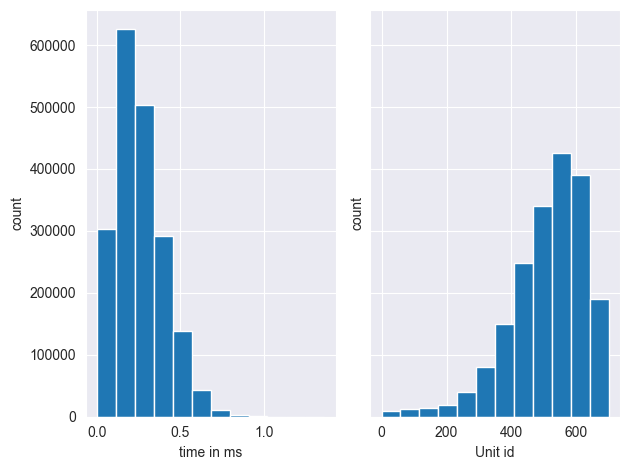

In [ ]:
print("START PLOTTING")
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(sampled_list_time, bins=12)
axs[0].set_xlabel("time in ms")
axs[0].set_ylabel("count")
print("hist1 done")
axs[1].hist(sampled_list_unit, bins=12)

axs[1].set_xlabel("Unit id")
axs[1].set_ylabel("count")
print("hist2 done")
plt.show()

### Histogram using seaborn

A similar histogram to the one from before using the seaborn libary

START PLOTTING
hist1 done
hist2 done


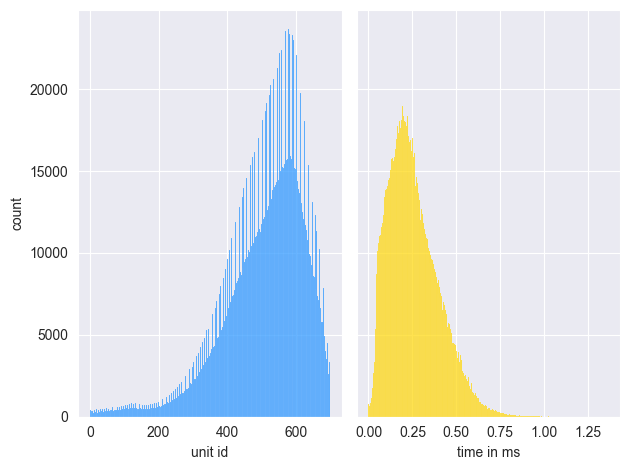

In [ ]:
print("START PLOTTING")
fig, axes = plt.subplots(1, 2, sharey=True, tight_layout=True)

sns.histplot(sampled_list_unit , color="dodgerblue", ax=axes[0])
axes[0].set_xlabel("unit id")
axes[0].set_ylabel("count")
print("hist1 done")
sns.histplot(sampled_list_time , color="gold", ax=axes[1])
axes[1].set_xlabel("time in ms")
axes[1].set_ylabel("count")
print("hist2 done")
plt.show()

### Scatter Plot

Scatter Plot with shows the unit id on the y-axis and the time on the x-axis. Plotted using matplotlib

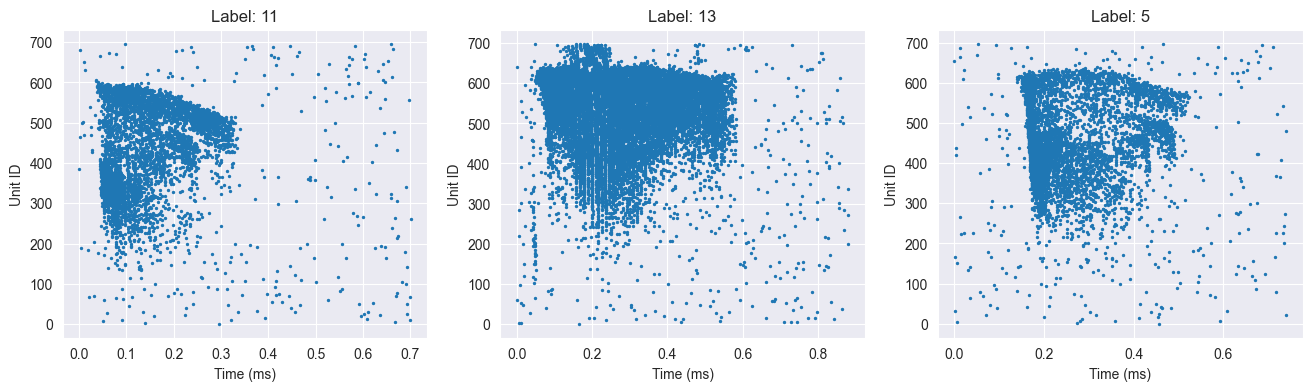

In [ ]:
fig = plt.figure(figsize=(16,4))
idx = np.random.randint(len(times),size=3)
for i,j in enumerate(idx):
    ax = plt.subplot(1,3,i+1)
    ax.scatter(times[i], units[i], s=2)
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Unit ID")
    ax.set_title(f"Label: {labels[i]}")

plt.show()

### Vectorizing english dataset


For now i wanted to focus on only the **english Data**. This can be done by creating a mask (a list of all the indexes with label values between 10 and 19) which can then be applied to the units as well as the time to only filter out the english data.


In [18]:
english_mask = np.array(labels) >= 10 # creates a mask
print(english_mask)

# apply mask onto time, units and labels
times_eng = times[english_mask]
units_eng = units[english_mask]
labels_eng = labels[english_mask]

[ True  True False ... False False False]
<class 'tables.carray.CArray'>
<class 'tables.vlarray.VLArray'>


## Plotting english labels


Plotting the english Data its apparent that most of the Data have unit its > 150. This plot is still very cluttered and not enough to draw this conclusion

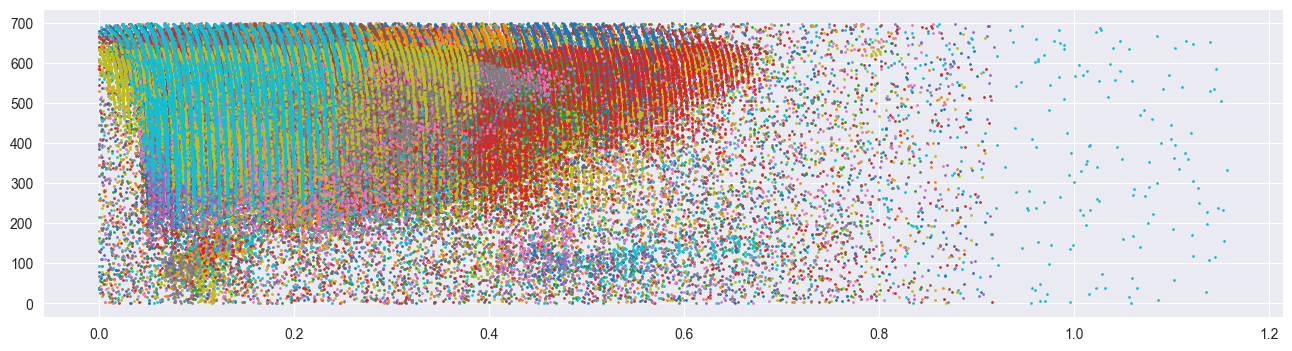

In [ ]:
fig = plt.figure(figsize=(16,4))
idx = np.random.randint(len(times_eng),size=40)
for i,j in enumerate(idx):
    #ax = plt.subplot(1,3,i+1)
    plt.scatter(times_eng[i], units_eng[i], s=1)


plt.show()

### Preprocessing for plotting different numbers

For further processing the Data is sorted into two distince dictionaries where the keys are equal to the ``labels - 10`` and the values are in the ``number_dict_unit`` equal to the units (1-700) and in the ``number_dict_time`` to the time (0 - 1.0).

In [20]:
number_dict_unit = {
    "0": [],
    "1": [],
    "2": [],
    "3": [],
    "4": [],
    "5": [],
    "6": [],
    "7": [],
    "8": [],
    "9": [],
}

number_dict_time = {
    "0": [],
    "1": [],
    "2": [],
    "3": [],
    "4": [],
    "5": [],
    "6": [],
    "7": [],
    "8": [],
    "9": [],
}

arr_units_eng = np.array(units_eng, dtype=object)
arr_times_eng = np.array(times_eng, dtype=object)

for i in range(10, 20):
    index = str(int(i) - 10)
    num_mask = np.array(labels_eng) == i
    number_dict_unit[index] = arr_units_eng[num_mask]
    number_dict_time[index] = arr_times_eng[num_mask]

#print("dicT", number_dict_unit["9"])
#print(labels_eng)
#print("num", units_eng[0])


### Plotting different Numbers

To get better insight into each number they are plotted seperatly into subplots with 10 being overlayed onto each other. From this plot its even more apparent that the first 150 units can most likely be cut off.

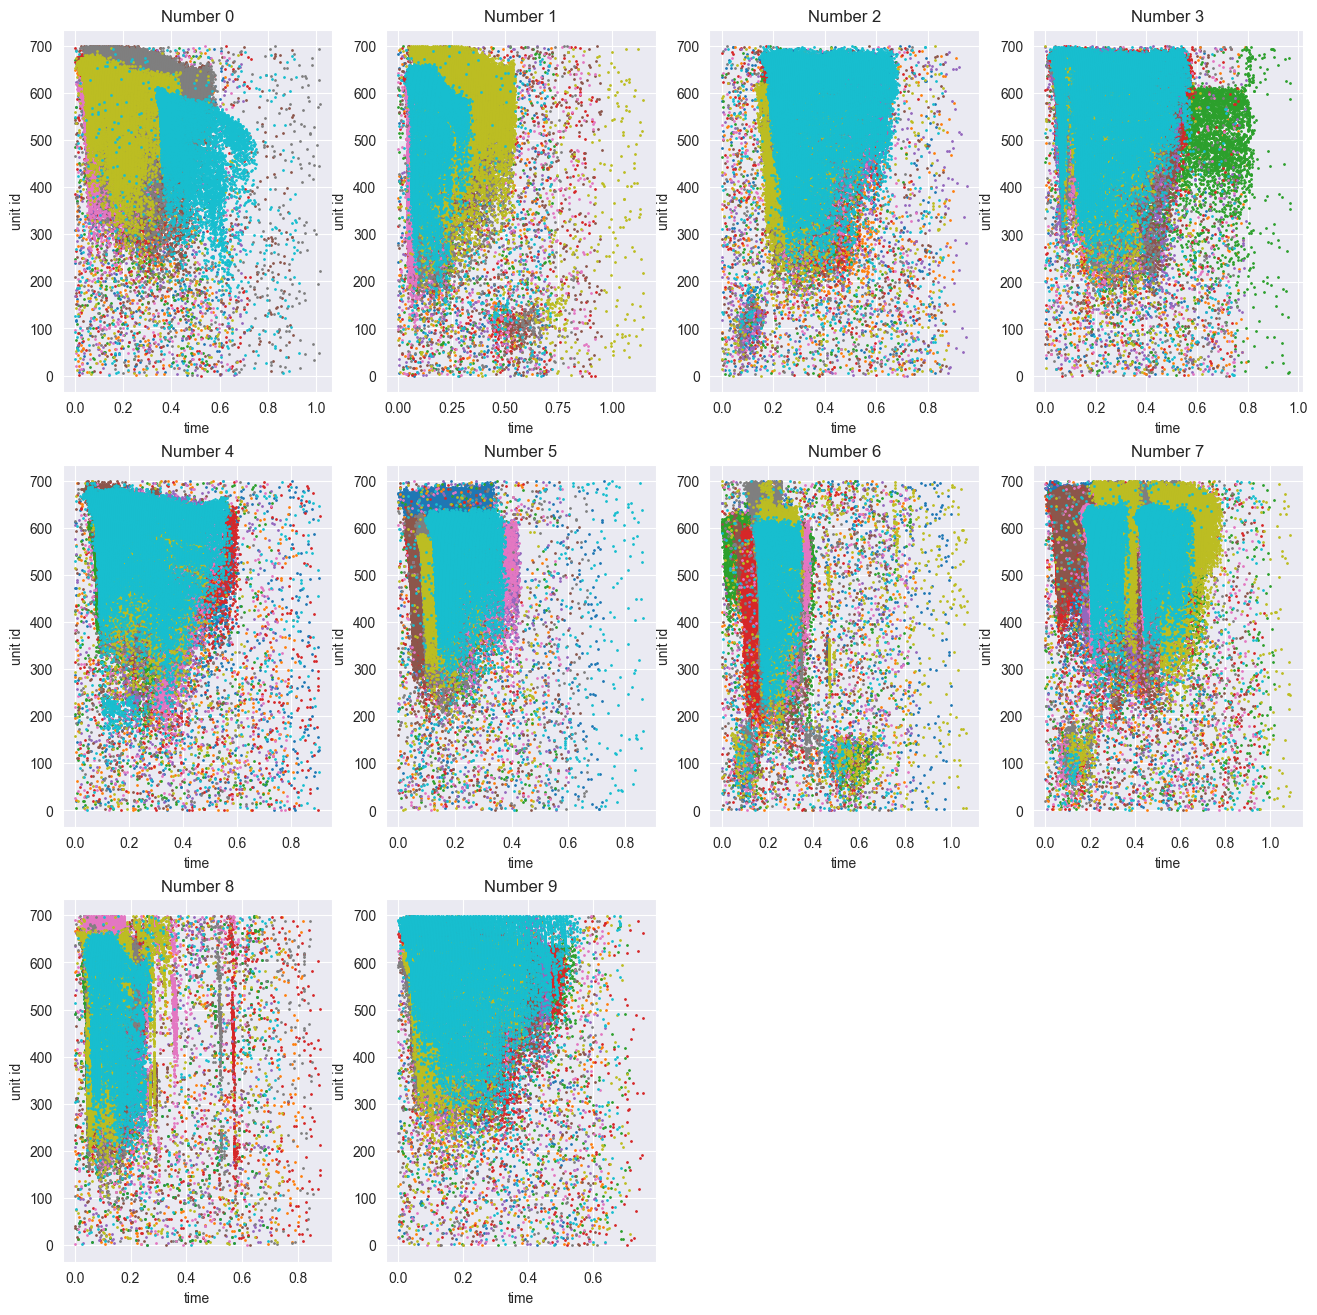

In [ ]:
fig = plt.figure(figsize=(16,16))

for i in range(0, 10):
    idx = np.random.randint(len(number_dict_time[str(i)]),size=10)
    ax = plt.subplot(3,4,i+1)
    for j in idx:
        time = number_dict_time[str(i)][j]
        unit = number_dict_unit[str(i)][j]
        plt.scatter(time, unit, s=1)
        plt.xlabel("time")
        plt.ylabel("unit id")
        plt.title(f"Number {i}")


plt.show()

## Gausian filter to reduce neuron number

### Turn numbers into matrix

To make further processing easier the two dictionaries ``number_dict_time`` and ``units_dict_time`` are combined into one matrix dictionary. The matrices in the ``matrix_dict`` have the time on the horizontal and the unit id on the vertical. The time is discretized by looping over the time of 1 second in 1ms steps and setting the matrix value in that interval to 1 at the according unit id if there is a spike during this interval.

Additionally the first 150 ``unit_ids`` are removed based on the previous oberservations.

In [21]:
def create_spike_matrices(number_dict_time, units_dict_time, num_units=550, time_duration=1.0, time_step_ms=1, start_unit_id = 150):

    num_time_steps = int(time_duration * 1000 / time_step_ms) + 1

    spike_matrices = {}

    for digit in tqdm(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]):
        matrices_for_digit = []

        spike_times_trials = number_dict_time[digit]
        unit_ids_trials = units_dict_time[digit]

        for trial_idx, (spike_times_trial, unit_ids_trial) in enumerate(zip(spike_times_trials, unit_ids_trials)):
            matrix = np.zeros((num_units, num_time_steps), dtype=np.int8)

            for time_val, unit_id in zip(spike_times_trial, unit_ids_trial):
                time_idx = int(time_val * 1000 / time_step_ms)
                if unit_id < 100:
                    continue
                else:
                    unit_id -= start_unit_id
                if 0 <= time_idx < num_time_steps and 0 <= unit_id  < num_units:
                    matrix[unit_id, time_idx] = 1

            matrices_for_digit.append(matrix)

        spike_matrices[digit] = matrices_for_digit

    return spike_matrices


matrix_dict = create_spike_matrices(number_dict_time, number_dict_unit)

  0%|          | 0/10 [00:00<?, ?it/s]/tmp/ipython-input-851190100.py:21: RuntimeWarning: overflow encountered in scalar subtract
  unit_id -= start_unit_id
100%|██████████| 10/10 [00:32<00:00,  3.29s/it]


### Plot matrices

To check if the matrices match up with the previous scatter plots they are plotted side by side.

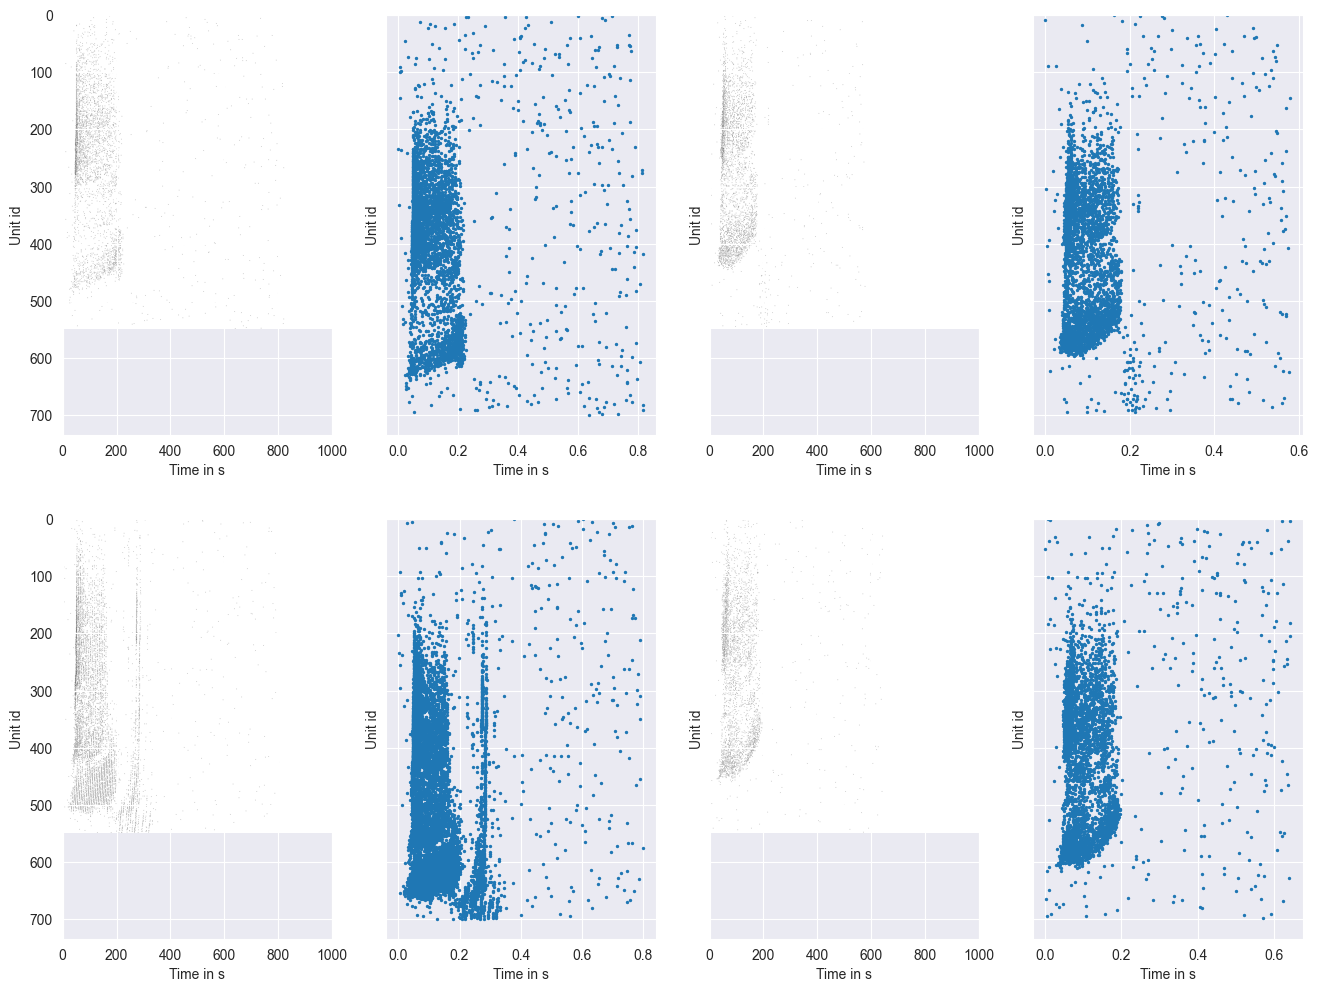

In [ ]:

def compare_matrix_to_scatter(number, count_plots):
    try:
        num_rows = round(count_plots / 4)
        fig, axs = plt.subplots(num_rows, 4, sharey=True, figsize=(16, 12))
        axs = axs.flatten()
        idx = np.random.choice(len(matrix_dict[f"{number}"]),size=count_plots, replace=False)
        for plot_idx, i in enumerate(idx):
            matrix_plot = matrix_dict[f"{number}"][i]

            axs[plot_idx * 2].imshow(matrix_plot, aspect="auto", cmap="binary")
            axs[plot_idx * 2].set_xlabel("Time in s")
            axs[plot_idx * 2].set_ylabel("Unit id")

            axs[plot_idx * 2 + 1].scatter(number_dict_time[f"{number}"][i], number_dict_unit[f"{number}"][i], s=2)
            axs[plot_idx * 2 + 1].set_xlabel("Time in s")
            axs[plot_idx * 2 + 1].set_ylabel("Unit id")

    except Exception as e:
        print()


    plt.show()

compare_matrix_to_scatter(8, 10)

### Apply Pooling to Matrix

To further reduce the amout of ``unit_ids`` and thus the amount of needed input neurons the matrices are reduced to a size of ``(183, 333)`` by making use of a 3x3 kernel and pooling.

In [23]:
def kernel_3x3_downsample(matrix, threshold=3):
    n_rows, n_cols = matrix.shape

    out_rows = n_rows // 3
    out_cols = n_cols // 3

    result = np.zeros((out_rows, out_cols), dtype=np.int8)

    for i in range(out_rows):
        for j in range(out_cols):
            patch = matrix[i*3:(i+1)*3, j*3:(j+1)*3]
            spike_count = np.sum(patch)

            result[i, j] = 1 if spike_count >= threshold else 0

    return result


In [24]:
test_matrix = matrix_dict["0"][5]
downsized_matrix = kernel_3x3_downsample(test_matrix, threshold=3)

print(test_matrix.shape)
print(downsized_matrix.shape)

(550, 1001)
(183, 333)


To check if the matrices are still representative of the original data they are plotted next to each other.

In [ ]:
def compare_matrix_to_downsize(number, count_plots):
    try:
        num_rows = round(count_plots / 4)
        fig, axs = plt.subplots(num_rows, 4, sharey=False, figsize=(16, 8))
        axs = axs.flatten()
        idx = np.random.choice(len(matrix_dict[f"{number}"]),size=count_plots, replace=False)
        for plot_idx, i in enumerate(idx):
            matrix_plot = matrix_dict[f"{number}"][i]
            matrix_plot_downsize = kernel_3x3_downsample(matrix_plot, threshold=1)

            axs[plot_idx * 2].imshow(matrix_plot, aspect="auto", cmap="binary")
            axs[plot_idx * 2].set_xlabel("Time in s")
            axs[plot_idx * 2].set_ylabel("Unit id")

            axs[plot_idx * 2 + 1].imshow(matrix_plot_downsize, aspect="auto", cmap="binary")
            axs[plot_idx * 2 + 1].set_xlabel("Time in s")
            axs[plot_idx * 2 + 1].set_ylabel("Unit id")

    except Exception as e:
        print()


    plt.show()

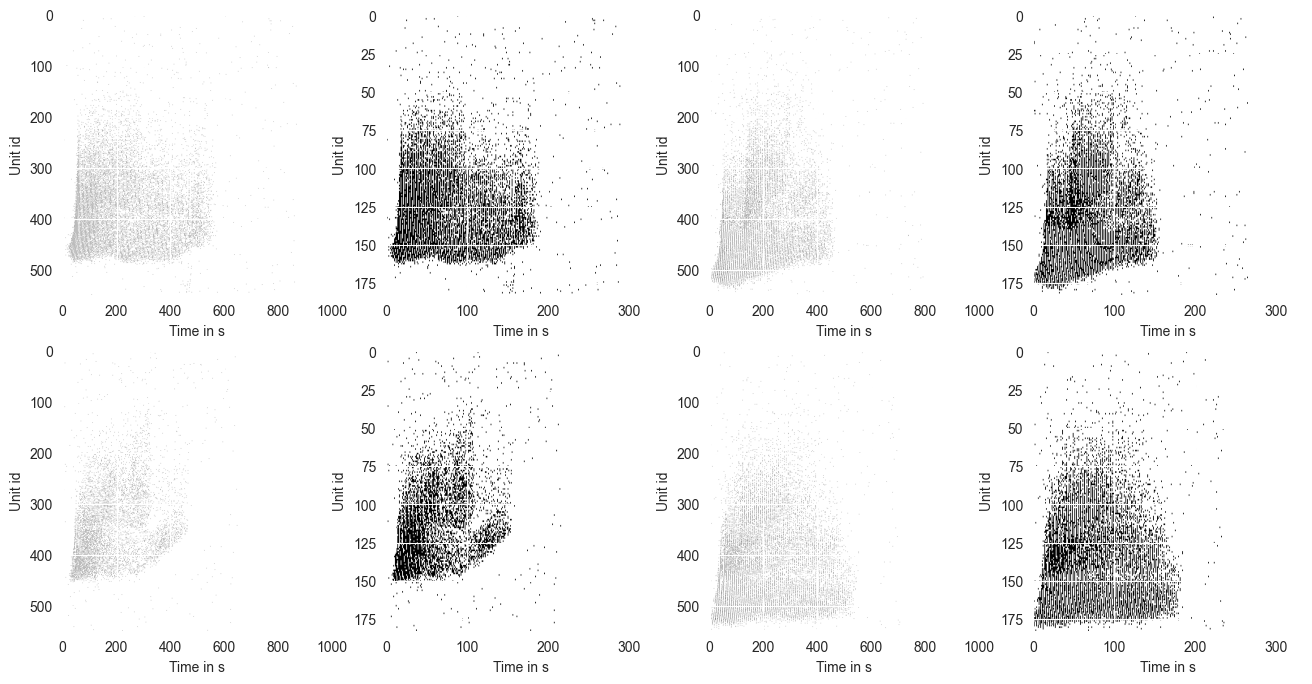

In [ ]:
compare_matrix_to_downsize(0, 10)

Depending on what threshold is choosen for the pooling (how many spikes need to be nearby to have a spike after pooling) multiple different threshold values are plotted again each other with the original unpooled matrix at the. In the end it looks like a threshold of 2 or 3 is the most promising.

In [ ]:
def plot_pooling_threshold():
    try:
        fig, axs = plt.subplots(10, 5, sharey=False, figsize=(18, 20))
        axs = axs.flatten()

        for k in range(0, 10):
            idx = np.random.choice(len(matrix_dict[f"{k}"]), size=1, replace=False)
            matrix_plot = matrix_dict[f"{k}"][idx[0]]

            axs[k * 5].imshow(matrix_plot, aspect="auto", cmap="binary")
            axs[k * 5].set_xlabel("Time in s")
            axs[k * 5].set_ylabel(f"Class {k}\nUnit id")
            axs[k * 5].set_title("Original")

            for i, num in enumerate([4, 3, 2, 1]):
                matrix_plot_downsize = kernel_3x3_downsample(matrix_plot, threshold=num)
                axs[(i + 1) + k * 5].imshow(matrix_plot_downsize, aspect="auto", cmap="binary")
                axs[(i + 1) + k * 5].set_xlabel("Time in s")
                axs[(i + 1) + k * 5].set_ylabel("Unit id")
                axs[(i + 1) + k * 5].set_title(f"Threshold {num}")

        fig.suptitle("Different Thresholds 3x3 Kernel Downsampling", fontsize=16, y=0.98)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error in plot_pooling_threshold: {e}")
        import traceback
        traceback.print_exc()


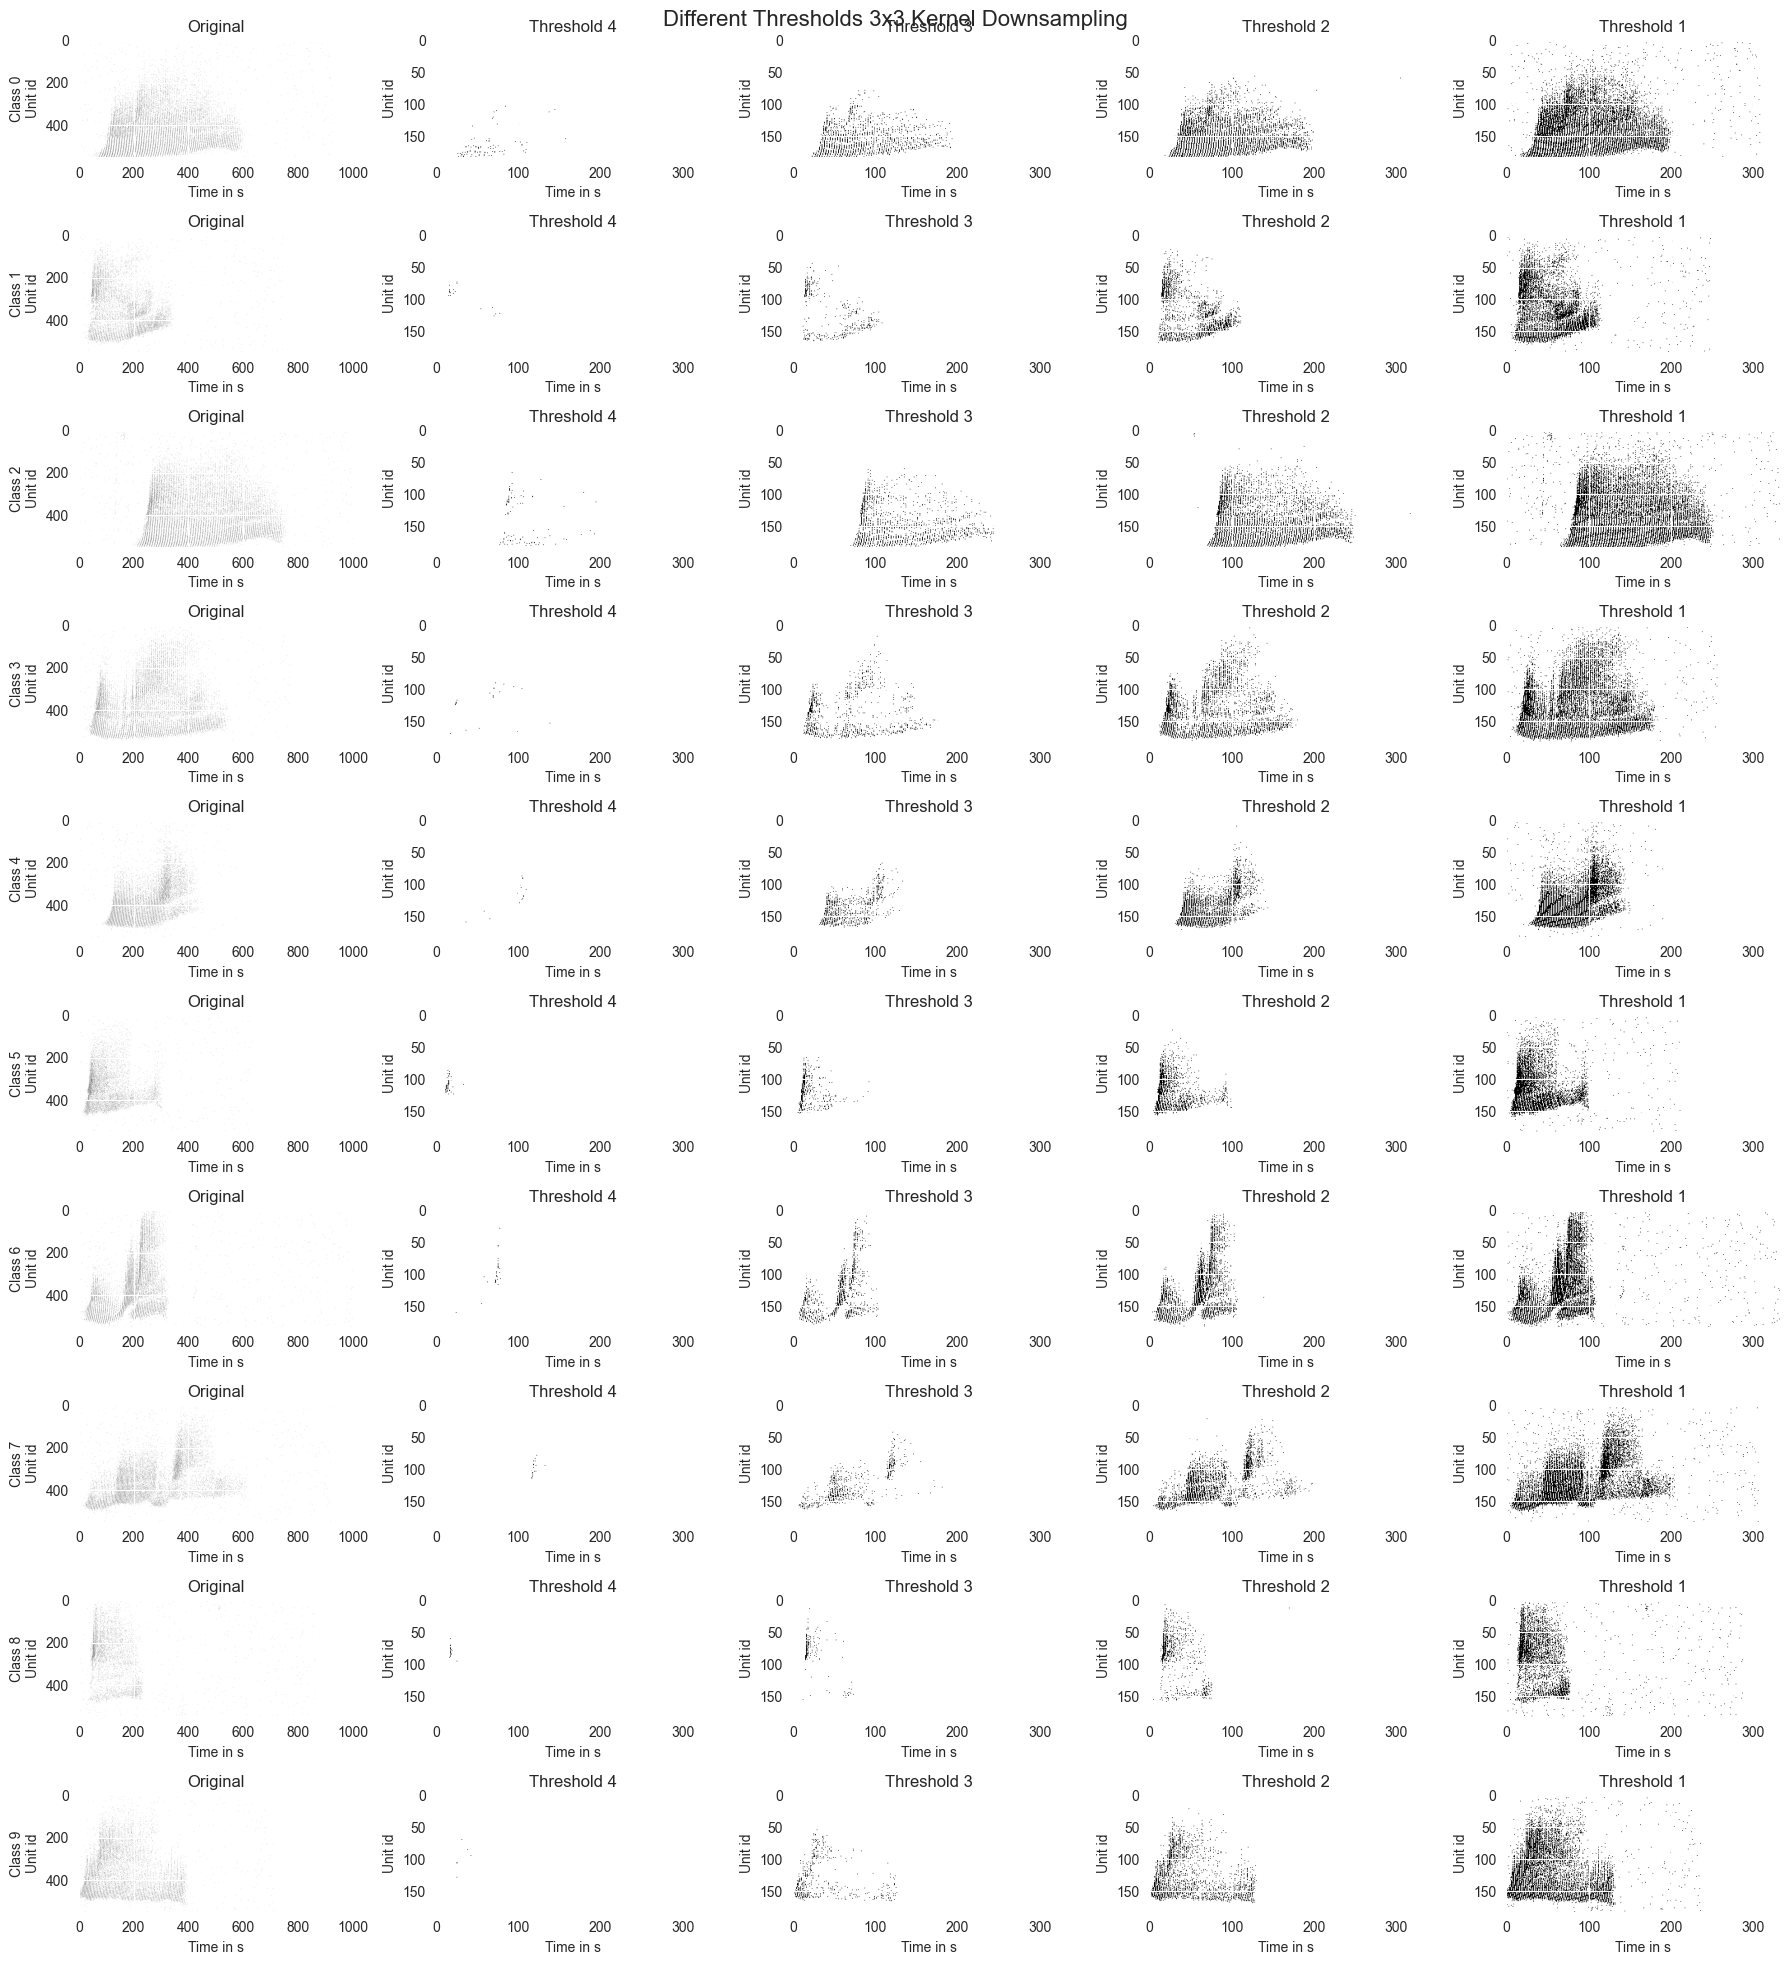

In [ ]:
plot_pooling_threshold()

In [25]:
!pip install snntorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 5.9 MB/s eta 0:00:00


## Training an SNN

### Preparing the Data

Before the training of the SNN can start it needs to be converted to the proper format. In the case the proper formate is a tensor of the shape ``(183, 333)`` which is then added to a list.

The code for this is very unoptimized and can take a long time to execute.

In [26]:
import snntorch as snn
from snntorch import spikeplot as splt
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

In [27]:
class HeidelbergDataset(Dataset):
    def __init__(self, matrix_dict, pooling_threshold=2):
        self.data = []
        self.labels = []

        for digit_str, matrices in matrix_dict.items():
            digit_int = int(digit_str)

            for matrix in tqdm(matrices):

                pooled_matrix = kernel_3x3_downsample(matrix, threshold=pooling_threshold)
                #pooled_matrix shape: (183, 333)

                tensor_matrix = torch.from_numpy(pooled_matrix).float()
                #tensor shape: (183, 333)

                self.data.append(tensor_matrix)
                self.labels.append(digit_int)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]  # returns (183, 333), label

In [242]:
#dtype = torch.float
#device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
#device = torch.device("mps")
#print(device)

def setup_device():
    print(f"PyTorch version: {torch.version}")
    print(f"CUDA available: {torch.cuda.is_available()}")


    if torch.cuda.is_available():
        print(f"CUDA version: {torch.version.cuda}")
        print(f"GPU count: {torch.cuda.device_count()}")
        for i in range(torch.cuda.device_count()):
            print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
            print(f"GPU {i} Memory: {torch.cuda.get_device_properties(i).total_memory / 1e9:.1f} GB")

        device = torch.device("cuda:0")

        # Enable optimizations for better performance
        torch.backends.cudnn.benchmark = True
        torch.backends.cudnn.deterministic = False

    else:
        print("CUDA not available, using CPU")
        device = torch.device("cpu")

    print(f"Selected device: {device}")
    return device

device = setup_device()

dtype = torch.float32  # or torch.float16 for mixed precision
print(f"Using dtype: {dtype}")

PyTorch version: <module 'torch.version' from '/usr/local/lib/python3.11/dist-packages/torch/version.py'>
CUDA available: True
CUDA version: 12.4
GPU count: 1
GPU 0: Tesla T4
GPU 0 Memory: 15.8 GB
Selected device: cuda:0
Using dtype: torch.float32


In [283]:
heidelberg_dataset = HeidelbergDataset(matrix_dict)
batch_size = 32

train_size = int(0.8 * len(heidelberg_dataset))
val_size = len(heidelberg_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(
    heidelberg_dataset, [train_size, val_size]
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Train samples: {len(train_dataset)}, Val samples: {len(val_dataset)}")

100%|██████████| 421/421 [02:07<00:00,  3.30it/s]

Train samples: 3316, Val samples: 829


In [244]:
num_inputs = 183
num_hidden = 256
num_outputs = 10
time_steps = 333
beta = 0.95

In [245]:
from snntorch import surrogate, backprop
import snntorch.functional as SF
import os

In [269]:
class HeidelbergSNN(nn.Module):
    def __init__(self, num_inputs=183, num_hidden=256, num_outputs=10, beta=0.95, surrogate_func="atan"):
        super().__init__()

        if surrogate_func == "fast_sigmoid":
            self.spike_grad = surrogate.fast_sigmoid(slope=25)

        elif surrogate_func == "triangular":
            self.spike_grad == surrogate.triangular()
        else:
            self.spike_grad = surrogate.atan()

        self.fc1 = nn.Linear(num_inputs, num_hidden)    # 183 -> 256
        self.lif1 = snn.Leaky(beta=beta, spike_grad=self.spike_grad)
        self.fc2 = nn.Linear(num_hidden, num_outputs)   # 256 -> 10
        self.lif2 = snn.Leaky(beta=beta, spike_grad=self.spike_grad)

        self._initialize_weights()


    def _initialize_weights(self):
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.zeros_(self.fc1.bias)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.zeros_(self.fc2.bias)

    def forward(self, x):
        # x shape: (batch_size, 183, 333)
        batch_size, num_units, time_steps = x.size()

        mem1 = self.lif1.init_leaky()
        mem2 = self.lif2.init_leaky()

        spk2_rec = torch.zeros(time_steps, batch_size, self.fc2.out_features,
                               device=x.device, dtype=x.dtype)
        mem2_rec = torch.zeros(time_steps, batch_size, self.fc2.out_features,
                               device=x.device, dtype=x.dtype)

        for t in range(time_steps):
            x_t = x[:, :, t]

            cur1 = self.fc1(x_t)
            spk1, mem1 = self.lif1(cur1, mem1)
            cur2 = self.fc2(spk1)
            spk2, mem2 = self.lif2(cur2, mem2)


            spk2_rec[t] = spk2
            mem2_rec[t] = mem2

        return spk2_rec, mem2_rec

net = HeidelbergSNN(surrogate_func="fast_sigmoid").to(device)

In [270]:
import snntorch.spikeplot as splt
import matplotlib.pyplot as plt
from IPython.display import HTML

In [271]:
def plot_spikeplot(spk_rec, batch_idx):
    fig, ax = plt.subplots(facecolor='w', figsize=(12, 7))
    labels=['0', '1', '2', '3', '4', '5', '6', '7', '8','9']

    #  Plot and save spike count histogram
    splt.spike_count(spk_rec, fig, ax, labels, num_steps=25,
    time_step=1e-3)
    plt.savefig(f'spike_plots/hist_{batch_idx}.png', dpi=300, bbox_inches='tight')
    """
    # Animate and save spike count histogram
    anim = splt.spike_count(spk_rec, fig, ax, labels, animate=True,
    interpolate=5, num_steps=25, time_step=1e-3)
    HTML(anim.to_html5_video())
    anim.save(f"spike_bar.gif")
    """


In [284]:
batch_size = 32
learning_rate = 1e-3
#num_epochs = 8
use_mixed_precision = False
scaler = torch.amp.GradScaler("cuda")

In [285]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate, betas=(0.9, 0.999), weight_decay=1e-4)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

train_loss_hist = []
val_loss_hist = []
train_acc_hist = []
val_acc_hist = []

In [286]:
# ===== TRAINING LOOP =====
def train_epoch(net, train_loader, optimizer, loss_fn, device, loss_type=None, scaler=None):
    net.train()
    total_loss = 0
    correct = 0
    total = 0

    for batch_idx, (data, targets) in enumerate(train_loader):
        data = data.to(device, dtype=dtype, non_blocking=True)
        targets = targets.to(device, non_blocking=True)

        optimizer.zero_grad()

        if scaler is not None:  # Mixed precision
            with torch.amp.autocast("cuda"):
                spk_rec, mem_rec = net(data)
                total_spikes = spk_rec.sum(0)
                loss_val = loss_fn(total_spikes, targets)

                #plot_spikeplot(spk_rec, batch_idx)

            scaler.scale(loss_val).backward()
            scaler.step(optimizer)
            scaler.update()
        else:  # Regular precision
            spk_rec, mem_rec = net(data)
            total_spikes = spk_rec.sum(0)
            loss_val = loss_fn(total_spikes, targets)
            loss_val.backward()
            optimizer.step()

        #backprop.BPTT(net, loss_val, optimizer, num_steps=data.shape[2])

        # Statistics
        total_loss += loss_val.item()
        _, predicted = total_spikes.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

        if batch_idx % 10 == 0:
            print(f'Batch: {batch_idx:3d}/{len(train_loader)}, '
                  f'Loss: {loss_val.item():.4f}, '
                  f'Acc: {100.*correct/total:.2f}%')

    avg_loss = total_loss / len(train_loader)
    accuracy = 100. * correct / total
    return avg_loss, accuracy

def validate_epoch(net, val_loader, loss_fn, device, loss_type=None):
    net.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for data, targets in val_loader:
            data = data.to(device)
            targets = targets.to(device)

            spk_rec, mem_rec = net(data)

            if loss_type == "rate":
                loss_val = SF.ce_rate_loss(spk_rec, targets)

            elif loss_type == "temporal":
                loss_val = SF.ce_temporal_loss


            elif loss_type == "max_membrane":
                loss_val = SF.ce_temporal_loss

            else:
                total_spikes = spk_rec.sum(0)

                loss_val = loss_fn(total_spikes, targets)

            total_loss += loss_val.item()
            _, predicted = total_spikes.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    avg_loss = total_loss / len(val_loader)
    accuracy = 100. * correct / total
    return avg_loss, accuracy



In [287]:
def print_gpu_memory():
    if torch.cuda.is_available():
        allocated = torch.cuda.memory_allocated() / 1e9
        cached = torch.cuda.memory_reserved() / 1e9
        print(f"GPU Memory - Allocated: {allocated:.2f} GB, Cached: {cached:.2f} GB")

def clear_gpu_cache():

    if torch.cuda.is_available():
        torch.cuda.empty_cache()

In [288]:
def plot_weight_matrices(net, save_path=None):
    fc1_weights = net.fc1.weight.detach().cpu().numpy()  # Shape: (256, 183)
    fc2_weights = net.fc2.weight.detach().cpu().numpy()  # Shape: (10, 256)

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    im1 = axes[0, 0].imshow(fc1_weights, cmap='RdBu_r', aspect='auto')
    axes[0, 0].set_title('FC1 Weight Matrix (256 x 183)')
    axes[0, 0].set_xlabel('Input Features')
    axes[0, 0].set_ylabel('Hidden Units')
    plt.colorbar(im1, ax=axes[0, 0])

    im2 = axes[0, 1].imshow(fc2_weights, cmap='RdBu_r', aspect='auto')
    axes[0, 1].set_title('FC2 Weight Matrix (10 x 256)')
    axes[0, 1].set_xlabel('Hidden Units')
    axes[0, 1].set_ylabel('Output Classes')
    plt.colorbar(im2, ax=axes[0, 1])


    axes[1, 0].hist(fc1_weights.flatten(), bins=50, alpha=0.7, label='FC1')
    axes[1, 0].set_title('FC1 Weight Distribution')
    axes[1, 0].set_xlabel('Weight Value')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].grid(True, alpha=0.3)

    axes[1, 1].hist(fc2_weights.flatten(), bins=50, alpha=0.7, label='FC2', color='orange')
    axes[1, 1].set_title('FC2 Weight Distribution')
    axes[1, 1].set_xlabel('Weight Value')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()

    if save_path:
        folder = save_path.split("/")[0]
        print(folder)
        if not os.path.exists(folder):
            os.makedirs(folder)
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"plot saved at {save_path}")
        else:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"plot saved at {save_path}")
    else:
        plt.show()

    plt.close(fig)

In [289]:
def train_loop(loss_type, num_epochs, surrogate_func):

    fc1_weight_history = []
    fc2_weight_history = []

    for epoch in range(num_epochs):
        print(f'\nEpoch {epoch+1}/{num_epochs}')
        print('-' * 50)

        clear_gpu_cache()

        train_loss, train_acc = train_epoch(net, train_loader, optimizer, loss_fn, device, loss_type=loss_type, scaler=scaler)

        val_loss, val_acc = validate_epoch(net, val_loader, loss_fn, device)

        scheduler.step()

        train_loss_hist.append(train_loss)
        val_loss_hist.append(val_loss)
        train_acc_hist.append(train_acc)
        val_acc_hist.append(val_acc)

        fc1_weight_history.append(net.fc1.weight.detach().cpu().numpy().copy())
        fc2_weight_history.append(net.fc2.weight.detach().cpu().numpy().copy())

        print(f"saving {epoch+1} weights")
        plot_weight_matrices(net, save_path=f"training_{surrogate_func}_{num_epochs}/epoch_{epoch+1}.png")

        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        print(f'LR: {optimizer.param_groups[0]["lr"]:.6f}')

        print_gpu_memory()

    print("\nTraining completed!")

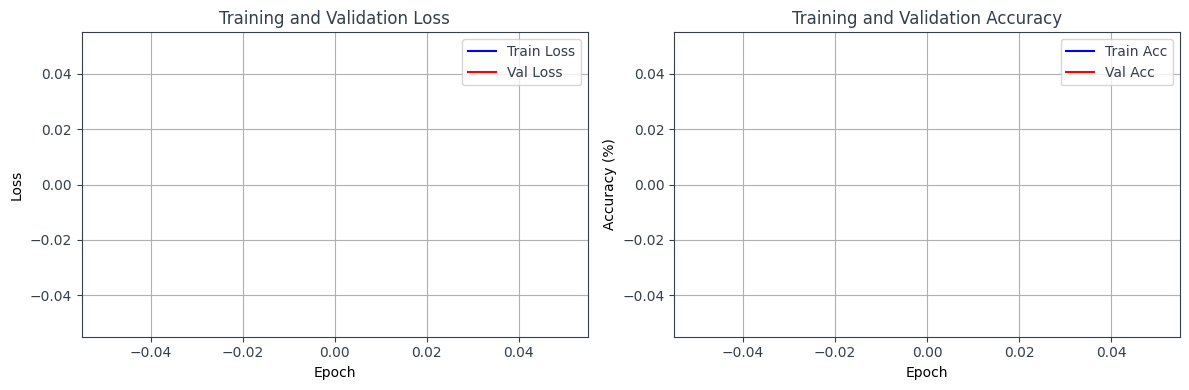

Model saved as 'heidelberg_snn_model.pth'


In [290]:
def plot_training_results(save_path=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.plot(train_loss_hist, label='Train Loss', color='blue')
    ax1.plot(val_loss_hist, label='Val Loss', color='red')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(train_acc_hist, label='Train Acc', color='blue')
    ax2.plot(val_acc_hist, label='Val Acc', color='red')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_title('Training and Validation Accuracy')
    ax2.legend()
    ax2.grid(True)

    if save_path:
        folder = save_path.split("/")[0]
        print(folder)
        if not os.path.exists(folder):

            os.makedirs(folder)
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        else:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Saved at {save_path}")

    else:
        plt.tight_layout()
        plt.show()

plot_training_results()

torch.save({
    'model_state_dict': net.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_loss_hist': train_loss_hist,
    'val_loss_hist': val_loss_hist,
    'train_acc_hist': train_acc_hist,
    'val_acc_hist': val_acc_hist,
}, 'heidelberg_snn_model.pth')

print("Model saved as 'heidelberg_snn_model.pth'")

In [ ]:
for surrogate_func in ["atan"]:
    for num_epoch in [10, 20, 30]:
        train_loop(num_epochs=num_epoch, loss_type=None, surrogate_func=surrogate_func)
        plot_training_results(save_path=f"training_{surrogate_func}_{num_epoch}/training_results.png")

        train_loss_hist = []
        val_loss_hist = []
        train_acc_hist = []
        val_acc_hist = []


Epoch 1/10
--------------------------------------------------
Batch:   0/104, Loss: 1.9520, Acc: 28.12%
Batch:  10/104, Loss: 2.0145, Acc: 26.42%
Batch:  20/104, Loss: 2.2154, Acc: 22.02%
Batch:  30/104, Loss: 1.9343, Acc: 20.77%
Batch:  40/104, Loss: 1.9300, Acc: 21.27%
Batch:  50/104, Loss: 2.3490, Acc: 20.71%
Batch:  60/104, Loss: 2.1863, Acc: 19.47%
Batch:  70/104, Loss: 2.1519, Acc: 19.37%
Batch:  80/104, Loss: 1.9932, Acc: 19.41%
Batch:  90/104, Loss: 2.1606, Acc: 19.64%
Batch: 100/104, Loss: 2.1293, Acc: 19.89%
saving 1 weights
training_atan_10
plot saved at training_atan_10/epoch_1.png
Train Loss: 2.1969, Train Acc: 19.84%
Val Loss: 2.1910, Val Acc: 18.46%
LR: 0.001000
GPU Memory - Allocated: 0.12 GB, Cached: 0.18 GB

Epoch 2/10
--------------------------------------------------
Batch:   0/104, Loss: 2.2286, Acc: 12.50%
Batch:  10/104, Loss: 2.4482, Acc: 19.89%
Batch:  20/104, Loss: 1.7336, Acc: 20.68%
Batch:  30/104, Loss: 2.1644, Acc: 23.08%
Batch:  40/104, Loss: 2.1286, Acc

In [280]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [281]:
def plot_weight_evolution(weight_history, layer_name):

    epochs = len(weight_history)
    mean_weights = [w.mean() for w in weight_history]
    std_weights = [w.std() for w in weight_history]
    max_weights = [w.max() for w in weight_history]
    min_weights = [w.min() for w in weight_history]

    plt.figure(figsize=(10, 6))

    plt.subplot(2, 2, 1)
    plt.plot(mean_weights)
    plt.title(f'{layer_name} Mean Weight')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Weight')
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 2)
    plt.plot(std_weights)
    plt.title(f'{layer_name} Weight Std Dev')
    plt.xlabel('Epoch')
    plt.ylabel('Weight Std')
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 3)
    plt.plot(max_weights, label='Max')
    plt.plot(min_weights, label='Min')
    plt.title(f'{layer_name} Weight Range')
    plt.xlabel('Epoch')
    plt.ylabel('Weight Value')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 4)

    if epochs >= 3:
        for i, epoch_idx in enumerate([0, epochs//2, epochs-1]):
            plt.hist(weight_history[epoch_idx].flatten(), bins=30, alpha=0.5,
                    label=f'Epoch {epoch_idx}')
        plt.title(f'{layer_name} Weight Distribution Evolution')
        plt.xlabel('Weight Value')
        plt.ylabel('Frequency')
        plt.legend()

    plt.tight_layout()
    plt.show()


In [282]:
plot_weight_evolution(fc1_weight_history, 'FC1')
plot_weight_evolution(fc2_weight_history, 'FC2')

NameError: name 'fc1_weight_history' is not defined

In [ ]:
plot_weight_matrices(net, save_path="training_weight_img")

In [ ]:
import matplotlib.pyplot as plt

# Plot FC1 weights (183 -> 256)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(net.fc1.weight.detach().cpu().numpy(), cmap='RdBu_r', aspect='auto')
plt.title('FC1 Weights (256 x 183)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(net.fc2.weight.detach().cpu().numpy(), cmap='RdBu_r', aspect='auto')
plt.title('FC2 Weights (10 x 256)')
plt.colorbar()

plt.tight_layout()
plt.show()

## Not used atm

### Input layer

In [ ]:
import copy

num_input_neurons = 700
idx = np.random.randint(len(times),size=3)
time_steps = np.linspace(0, 1, 1001)
print(type(times))
times_list_tocopy = list(times)
units_list_tocopy = list(units)
time_copy = copy.deepcopy(times_list_tocopy)
unit_copy = copy.deepcopy(units_list_tocopy)

spikes_index_list = []

print(time_steps)
for k in idx:
    for ms in time_steps:
        for i, time in enumerate(time_copy[k]):
            if time < ms:
                spikes_index_list.append(unit_copy[i])
                del time_copy[k][i]

        print(spikes_index_list)



<class 'tables.vlarray.VLArray'>
[0.    0.001 0.002 ... 0.998 0.999 1.   ]
[]


ValueError: cannot delete array elements

### Create smaller train Dataset

In [ ]:
subset_factor = 0.05

unit_list = []
time_list = []
label_list = []

subset_units = []
subset_times = []
subset_labels = []


for i in tqdm(times):
    for k in i:
        time_list.append(k)

for i in tqdm(units):
    for k in i:
        unit_list.append(i)

for i in tqdm(range(len(labels))):
    label_list.append(i)

size = int(round(subset_factor * len(time_list)))


In [ ]:
print(size)
idx = np.random.randint(len(times), size=size)

for i in idx:
    subset_times.append(times[i])
    subset_units.append(units[i])
    subset_labels.append(labels[i])

In [ ]:
print(f"All subsets same lenght: {(len(subset_times) == len(subset_units) == len(subset_labels))}")
print(f"lenght subset lists: {len(subset_times)}")